In [4]:
!pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.6 MB 4.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.6 MB 4.4 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.6 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.6 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 6.0/12.6 MB 4.3 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 4.3 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.6 MB 4.3 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.6 MB 4.3 MB/s eta 0:00:01
   ------------------------------ 

In [10]:
import pandas as pd

# Load the datasets
train_path = r"C:\Users\aflah\OneDrive\Desktop\Future Intern Tasks\Future_DS_02\train.csv"
test_path = r"C:\Users\aflah\OneDrive\Desktop\Future Intern Tasks\Future_DS_02\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert 'date' column to datetime format
train_df["date"] = pd.to_datetime(train_df["date"])
test_df["date"] = pd.to_datetime(test_df["date"])

# Aggregate sales by date
sales_per_day = train_df.groupby("date")["sales"].sum().reset_index()

# Display the first few rows of aggregated sales data
print(sales_per_day.head())

        date          sales
0 2013-01-01    2511.618999
1 2013-01-02  496092.417944
2 2013-01-03  361461.231124
3 2013-01-04  354459.677093
4 2013-01-05  477350.121229


In [14]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.8 MB 3.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 4.5 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.2 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   - ---------------------------

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(sales_per_day["sales"])

# Print results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Statistic: -2.6161957486048575
p-value: 0.08969592175787455
Critical Values: {'1%': np.float64(-3.4342930672797065), '5%': np.float64(-2.8632816397229064), '10%': np.float64(-2.567697207194407)}


In [20]:
# Data is Not stationary so we should do it again 
# Apply first-order differencing
sales_per_day["sales_diff"] = sales_per_day["sales"].diff()

# Drop the first row (NaN after differencing)
sales_per_day = sales_per_day.dropna()

# Perform ADF test again
adf_test_diff = adfuller(sales_per_day["sales_diff"])

# Print results
print("ADF Statistic (Differenced Data):", adf_test_diff[0])
print("p-value:", adf_test_diff[1])
print("Critical Values:", adf_test_diff[4])

ADF Statistic (Differenced Data): -11.494679187188776
p-value: 4.645171054102497e-21
Critical Values: {'1%': np.float64(-3.434304991207054), '5%': np.float64(-2.86328690299757), '10%': np.float64(-2.5677000098164484)}


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p=1, d=1, q=1 as an initial guess)
model = ARIMA(sales_per_day["sales"], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

D:\Data Engineer\Python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
D:\Data Engineer\Python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
D:\Data Engineer\Python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1682
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22307.295
Date:                Sun, 30 Mar 2025   AIC                          44620.589
Time:                        10:38:28   BIC                          44636.871
Sample:                             0   HQIC                         44626.620
                               - 1682                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4424      0.018     24.294      0.000       0.407       0.478
ma.L1         -0.9609      0.008   -124.309      0.000      -0.976      -0.946
sigma2      2.468e+10   1.52e-13   1.62e+23      0.0

In [29]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 3.8 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.8 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.8 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.9 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 3.8 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 3.6 MB/s eta 0:00:01
   -----------------------------------

D:\Data Engineer\Python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Data Engineer\Python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


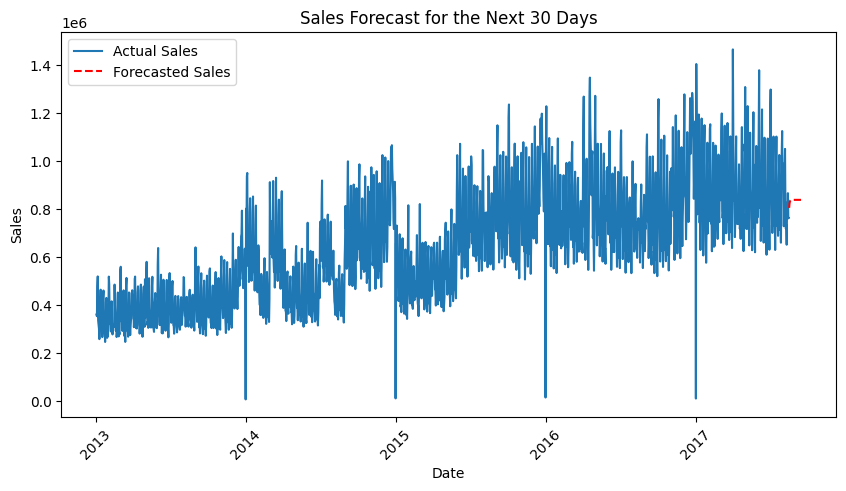

In [31]:
import matplotlib.pyplot as plt

# Forecast for the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create future date index
future_dates = pd.date_range(start=sales_per_day["date"].iloc[-1], periods=forecast_steps+1, freq="D")[1:]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({"date": future_dates, "predicted_sales": forecast.values})

# Plot the actual vs forecasted values
plt.figure(figsize=(10,5))
plt.plot(sales_per_day["date"], sales_per_day["sales"], label="Actual Sales")
plt.plot(forecast_df["date"], forecast_df["predicted_sales"], label="Forecasted Sales", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for the Next 30 Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()